In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as s
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


In [2]:
data = pd.read_csv(".dataset.csv")

In [3]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:

data.head()  #print first five rows by default

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
# Get the number of rows and columns
num_observations, num_features = data.shape

# Print the results
print(f"Number of observations (rows): {num_observations}")
print(f"Number of features (columns): {num_features}")

Number of observations (rows): 918
Number of features (columns): 12


In [8]:
data.dtypes  #define the type of data.


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

The categorical columns will be dtype object for this dataset. We need to note that a couple of columns -- FastingBS and HeartDisease -- have the dtype int64, but are also categorical variables, since they only take the values 0 and 1.

In [9]:
data.dtypes.value_counts()

int64      6
object     5
float64    1
Name: count, dtype: int64

In [10]:
data.describe()       #Display the descriptive statistics for the DataFrame

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


RestingBP should not be 0 its minimum is 0 and max is 200

Average age is 53

RestingBP and Cholesterol have a minimum value of zero.

In [11]:
data.isna().sum() #shows if there are any missing values in the data

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There don't seem to be any missing values in these columns.

In [12]:
data.nunique(axis=0)  #returns the number of unique values for each variable

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [13]:
data.describe(include=['object'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [16]:
data["FastingBS"].unique(), data["HeartDisease"].unique() 

(array([0, 1]), array([0, 1]))

In [21]:
#List of categorical columns
categorical_columns = ['Age','HeartDisease', 'FastingBS', 'Sex', 'ChestPainType', 'RestingECG','Oldpeak', 'RestingBP']

In [22]:
# Loop through each categorical column
for column in categorical_columns:
    # Get the count of each category in the column
    category_counts = data[column].value_counts()

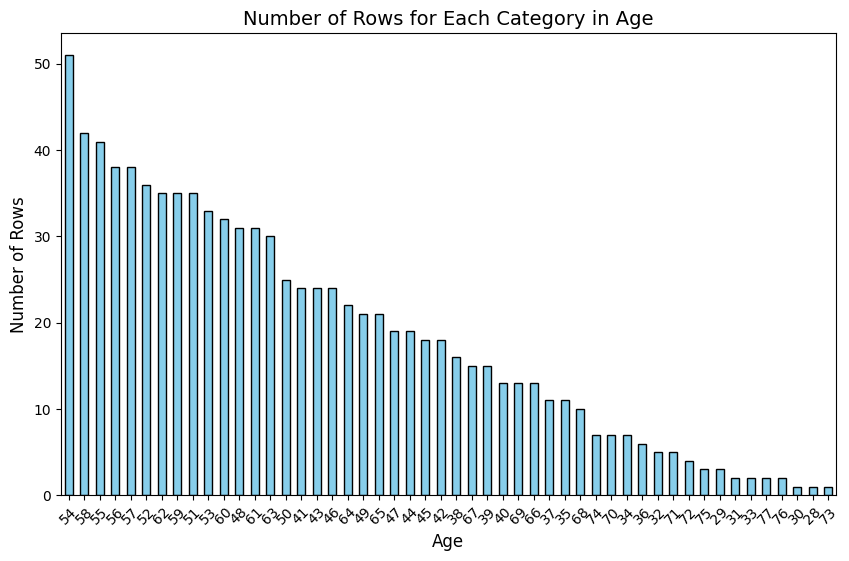

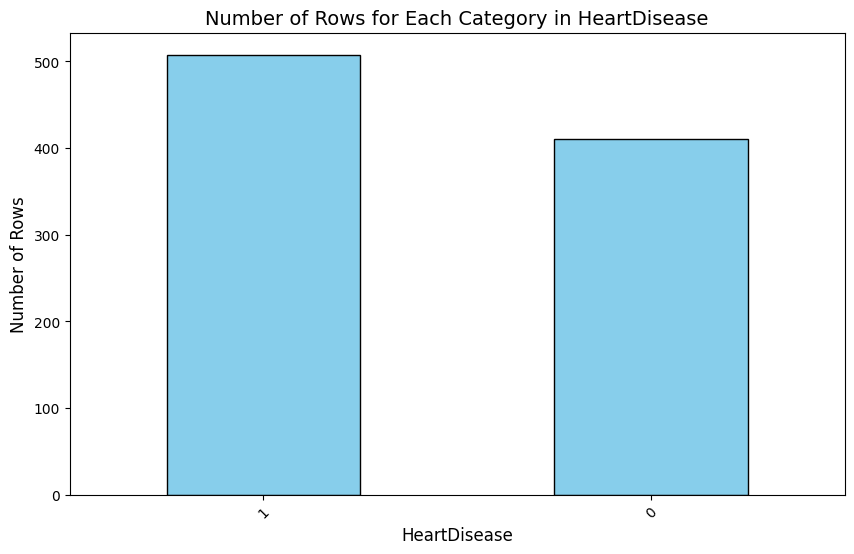

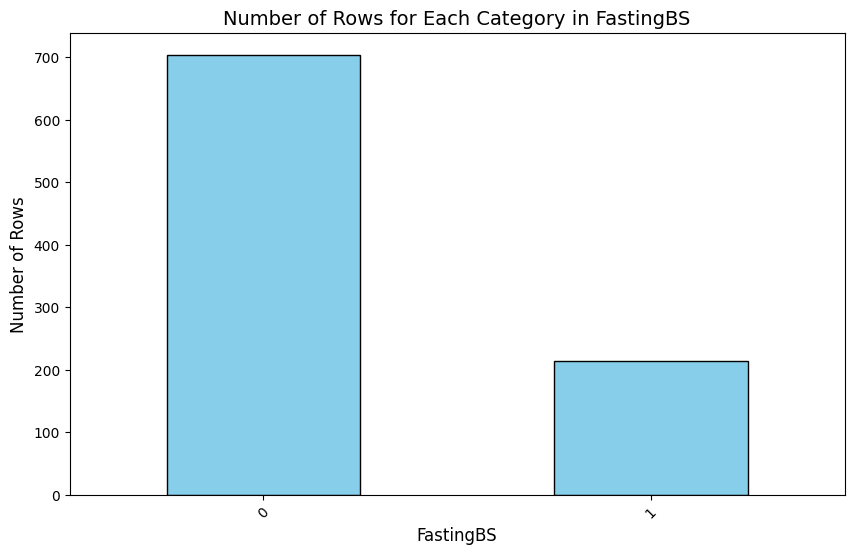

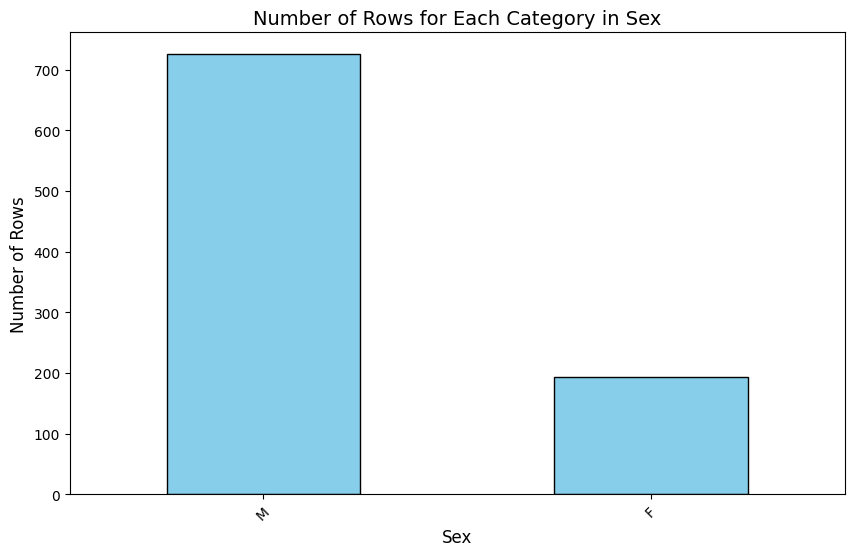

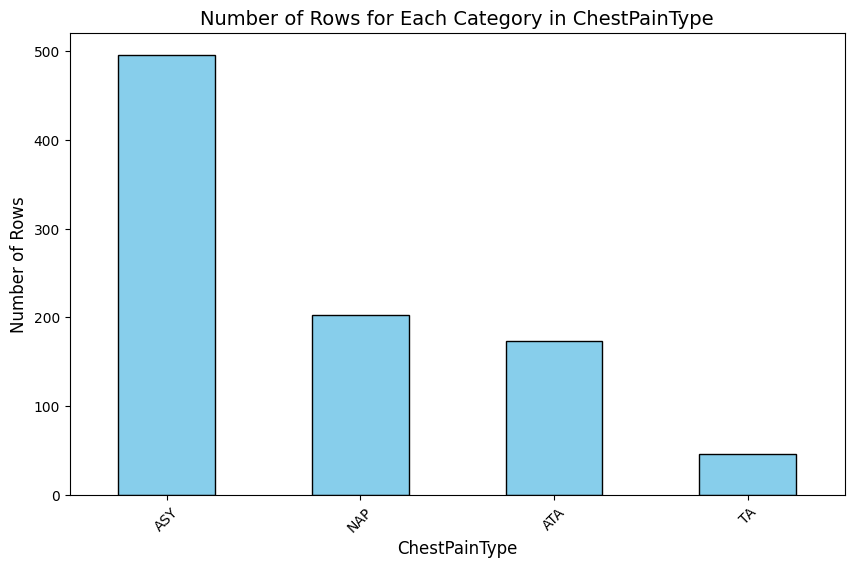

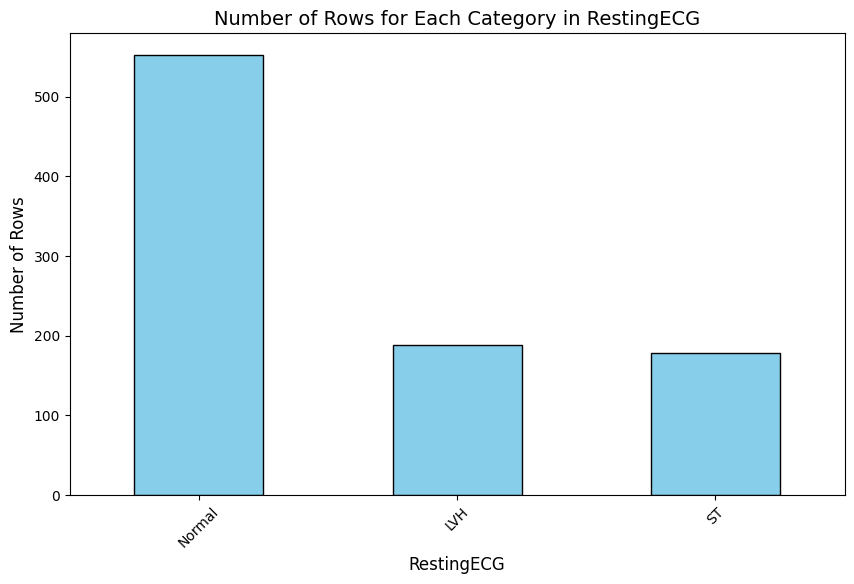

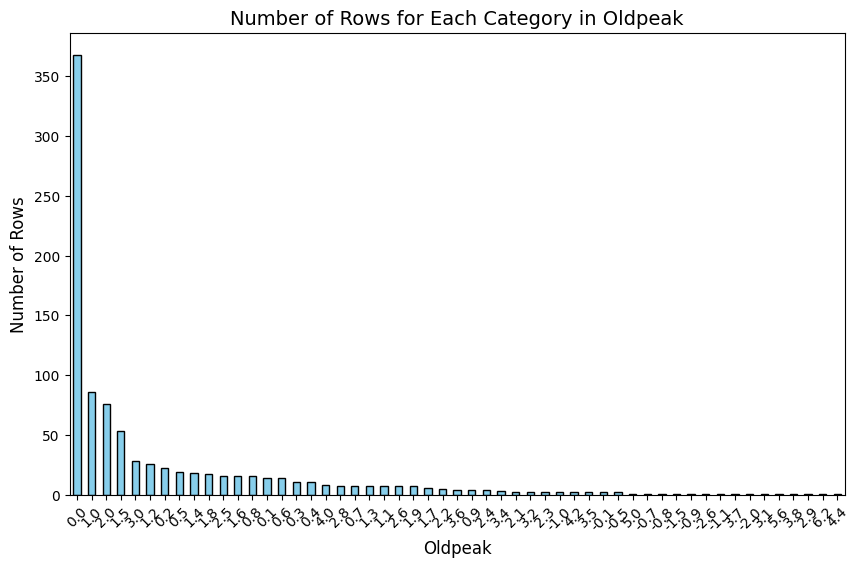

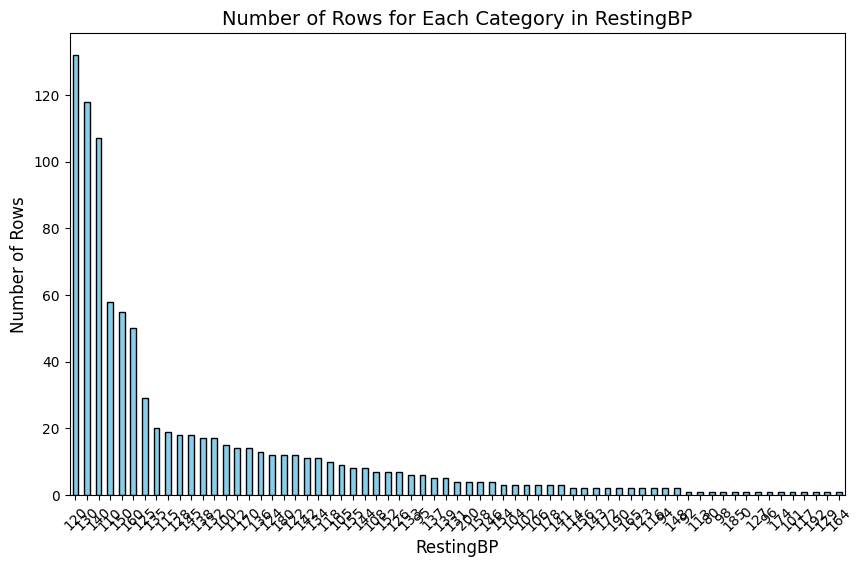

In [19]:

# Loop through each categorical column and plot its bar chart
for column in categorical_columns:
    # Get the count of each category in the column
    category_counts = data[column].value_counts()
    
    # Create a new figure for each column's bar chart
    plt.figure(figsize=(10, 6))
    
    # Plot the bar chart for the current column
    category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    
    # Add title and labels
    plt.title(f'Number of Rows for Each Category in {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Number of Rows', fontsize=12)
    
    # Display the bar chart
    plt.xticks(rotation=45)
    
    # Show each plot one by one
    plt.show()


<Figure size 1000x800 with 0 Axes>

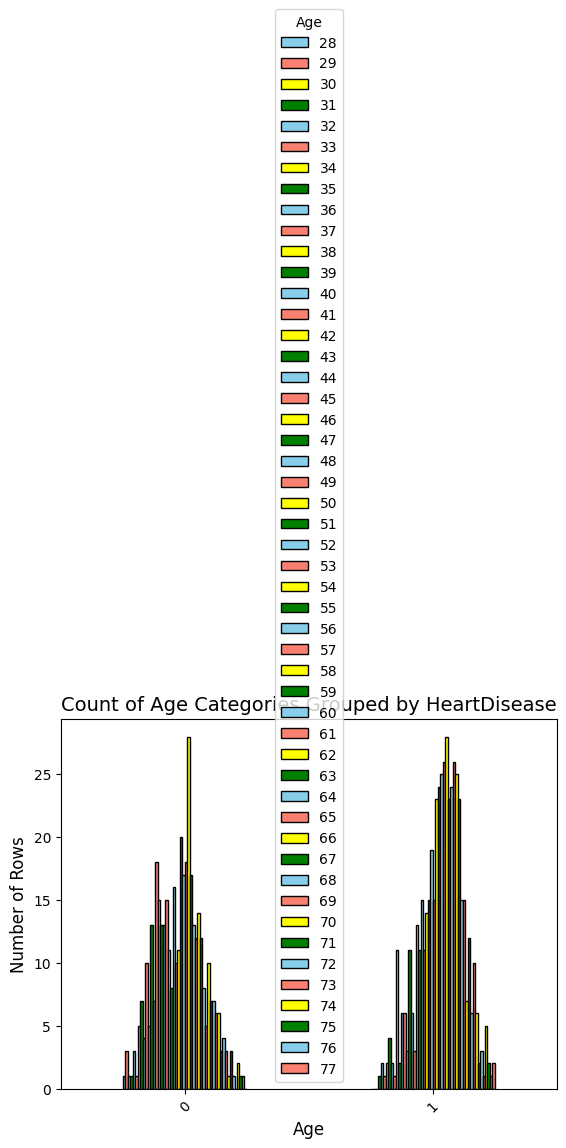

<Figure size 1000x800 with 0 Axes>

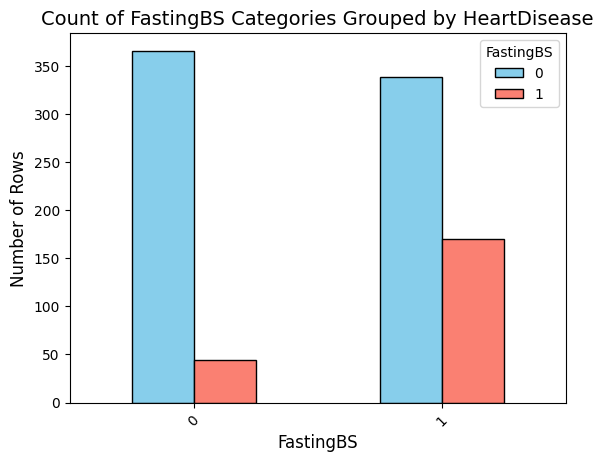

<Figure size 1000x800 with 0 Axes>

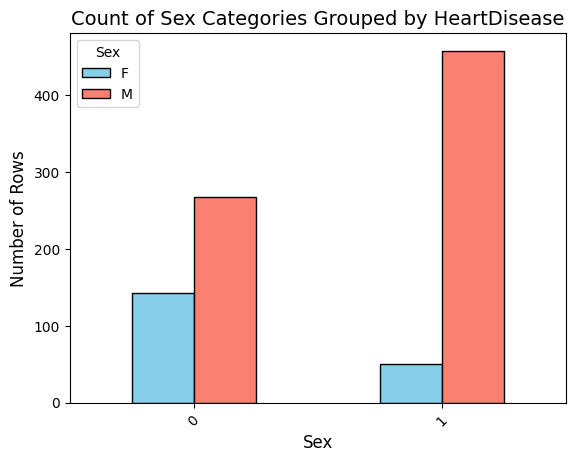

<Figure size 1000x800 with 0 Axes>

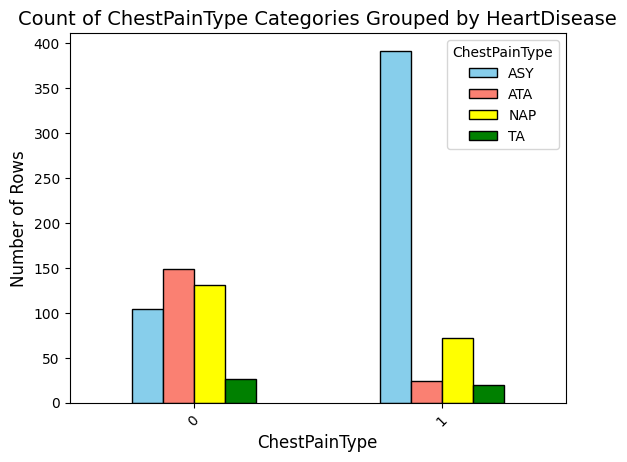

<Figure size 1000x800 with 0 Axes>

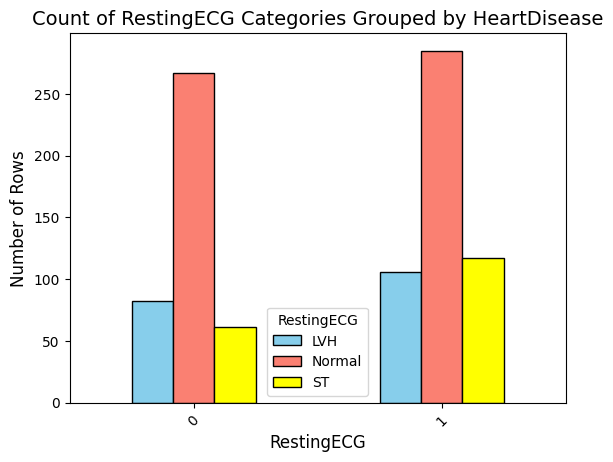

<Figure size 1000x800 with 0 Axes>

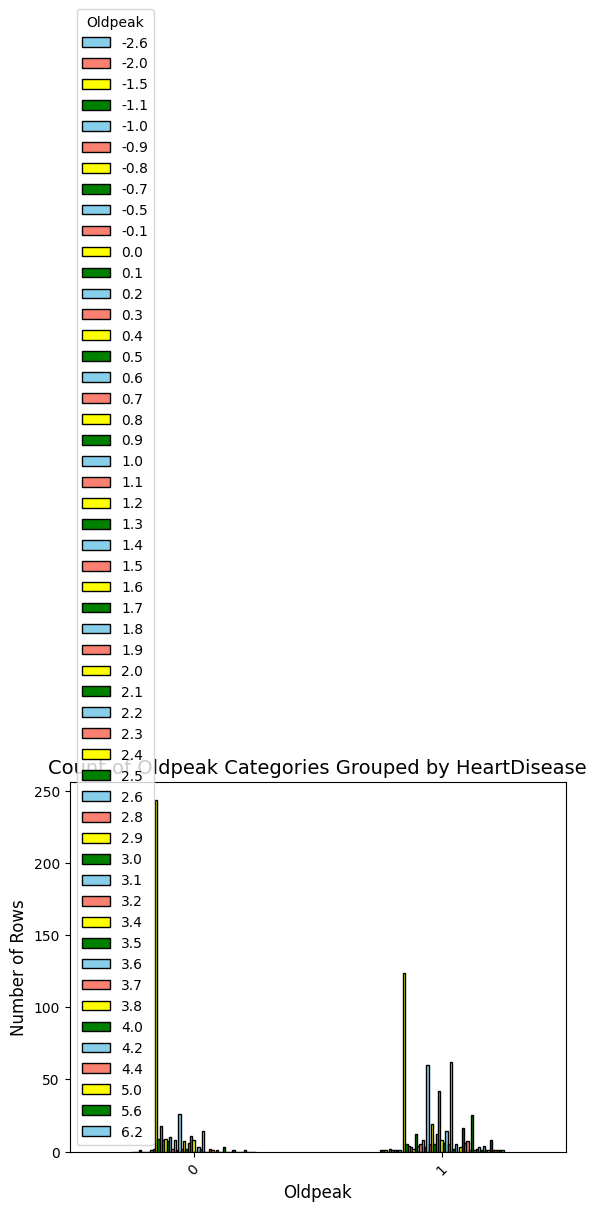

<Figure size 1000x800 with 0 Axes>

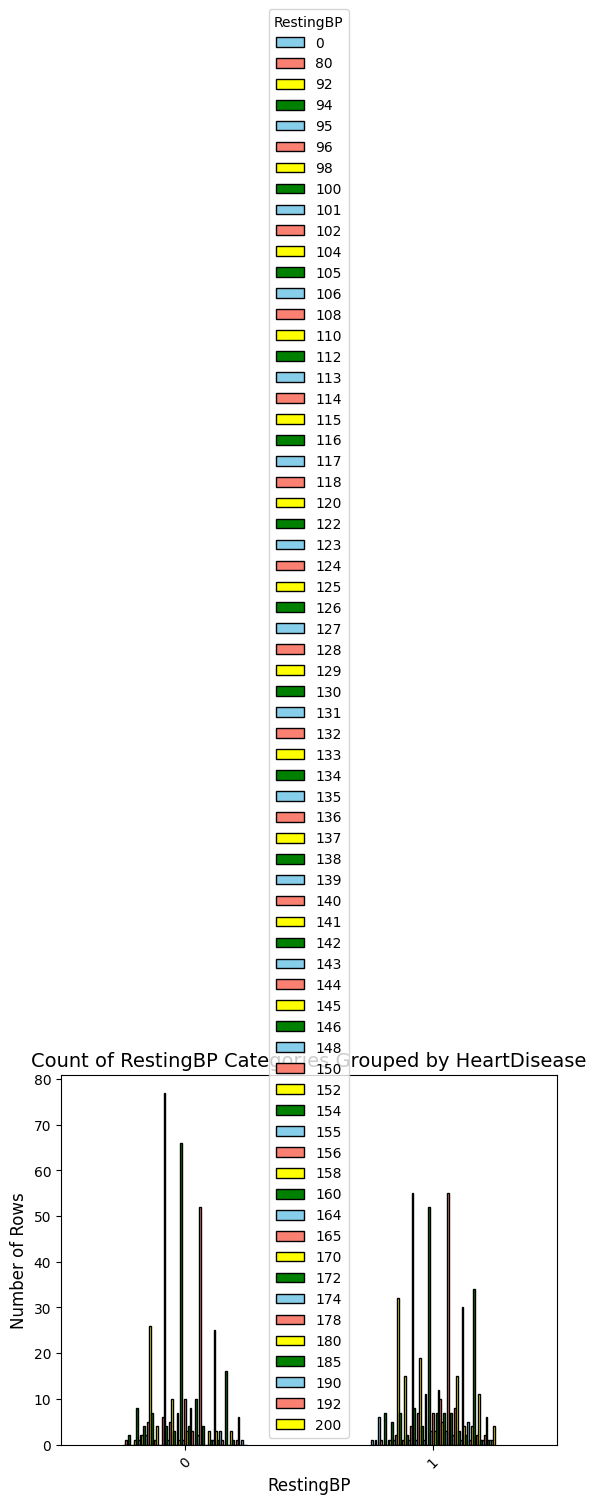

In [23]:
categorical_columns = list(categorical_columns)  # Convert to list to append

# Loop through each categorical column and plot its bar chart grouped by 'HeartDisease'
for column in categorical_columns:
    if column != 'HeartDisease':  # Skip 'HeartDisease' itself
        # Group by 'HeartDisease' and count the categories in the current column
        
        # Use .value_counts() instead of .size() for better handling of missing data
        grouped = data.groupby(['HeartDisease', column]).size().unstack(fill_value=0)
        
        # Create a new figure for each column's bar chart
        plt.figure(figsize=(10, 8))
        
        # Plot the bar chart for the current column grouped by 'HeartDisease'
        grouped.plot(kind='bar', stacked= False, color=['skyblue', 'salmon', 'yellow', 'green'], edgecolor='black')
        
        # Add title and labels
        plt.title(f'Count of {column} Categories Grouped by HeartDisease', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Number of Rows', fontsize=12)
        
        # Display the bar chart
        plt.xticks(rotation=45)
        
        # Show each plot one by one
        plt.show()

In [24]:
# Filter the DataFrame for patients diagnosed with heart disease (HeartDisease == 1)
data[data['HeartDisease'] == 1]['Age'].median()
#median_age_heart_disease = heart_disease_patients['Age'].median()

np.float64(57.0)

In [25]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [26]:
data[data['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


Above data has 0 as a value of cholesterol, dropping this amount of data is not feasible so we are going to replace it by the median of the cholesterol data.

In [27]:
median_cholesterol=data['Cholesterol'].median() # found median

In [28]:
data['Cholesterol'] = data['Cholesterol'].replace(0, median_cholesterol)

In [29]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [30]:
data[data['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


Now no rows of cholesterol has 0 as its value

In [31]:
data[data['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,223,0,Normal,155,N,1.5,Flat,1


Only one row of restingBP has 0 as its value so we simply drop it.

In [32]:
data.drop(449, inplace=True)  #dropped the row which has 0 as a value of restingBP

In [33]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [34]:
data[["Cholesterol", "RestingBP"]].describe()

,Cholesterol,RestingBP
count,917.000000,917.000000
mean,240.600872,132.540894
std,54.009298,17.999749
min,85.000000,80.000000
25%,214.000000,120.000000
50%,223.000000,130.000000
75%,267.000000,140.000000
max,603.000000,200.000000


We got our almost cleaned data.

In [36]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True



We will first convert our categorical columns into dummy variables.

<Axes: >

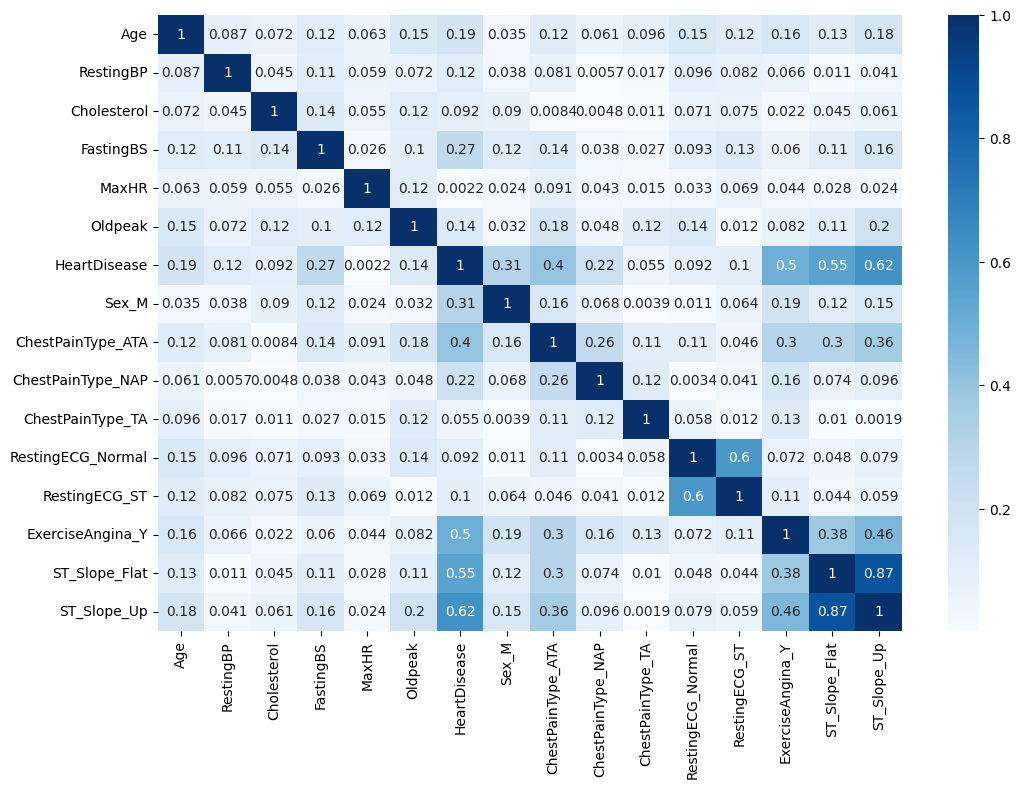

In [61]:
correlations = abs(data.corr()) # Computes the correlation matrix for a DataFrame.
plt.figure(figsize=(12,8))
sns.heatmap(correlations, annot=True, cmap="Blues")

<Axes: >

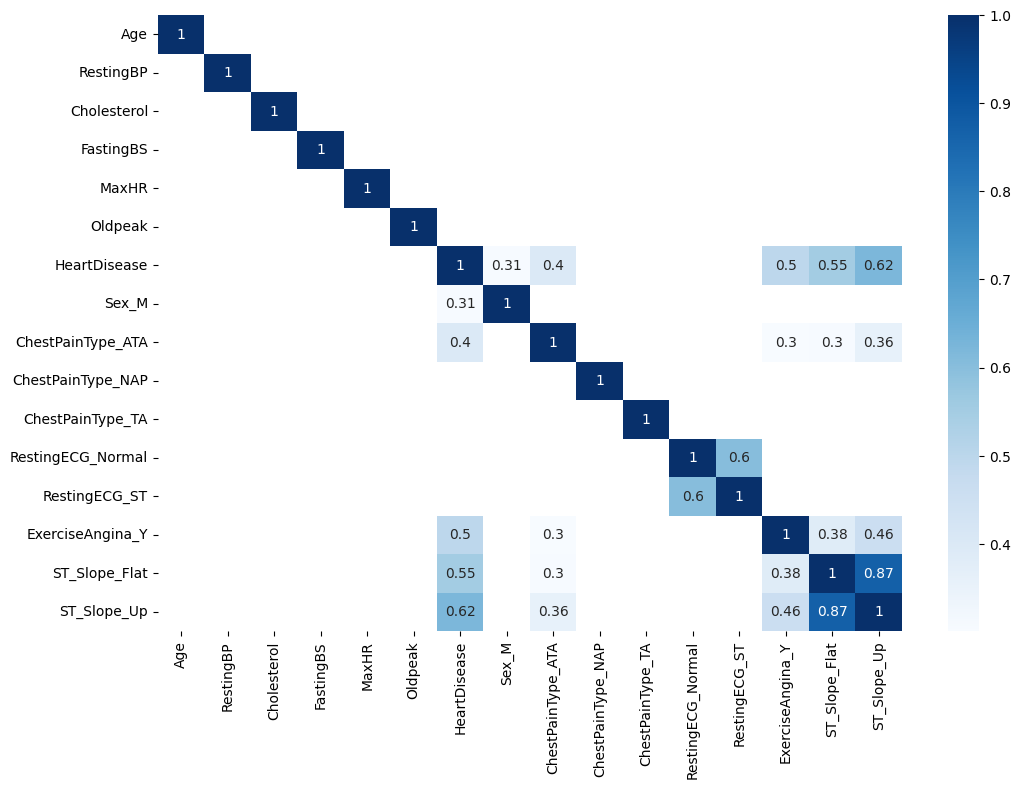

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(correlations[correlations > 0.3], annot=True, cmap="Blues")

In [48]:
X = data.drop(["HeartDisease"], axis=1)
y = data["HeartDisease"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state = 417)

features = [
    "Oldpeak",
    "Sex_M",
    "ExerciseAngina_Y",
    "ST_Slope_Flat",
    "ST_Slope_Up"
]

Building a Classifier with One Feature¶
We will split our dataset into a training and a test set first.

We will start with creating a model for each of the features above and evaluate their performance using accuracy as a metric.

In [49]:
for feature in features:
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train[[feature]], y_train)
    accuracy = knn.score(X_val[[feature]], y_val)
    print(f"The k-NN classifier trained on {feature} and with k = 3 has an accuracy of {accuracy*100:.2f}%")

The k-NN classifier trained on Oldpeak and with k = 3 has an accuracy of 78.26%
The k-NN classifier trained on Sex_M and with k = 3 has an accuracy of 61.59%
The k-NN classifier trained on ExerciseAngina_Y and with k = 3 has an accuracy of 73.19%
The k-NN classifier trained on ST_Slope_Flat and with k = 3 has an accuracy of 81.88%
The k-NN classifier trained on ST_Slope_Up and with k = 3 has an accuracy of 84.06%


Our best forming model, with an accuracy of ~`84%, was trained on the ST_Slope_Upfeature withST_Slope_Flat` being a close second. These make sense given the data distributions we saw previously.

We will train a model using all of these features next.

Building a Classifier with Multiple Features¶
Before training on all of the above features, we need to normalize the data first. We will use scikit-learn's MinMaxScaler to scale the values between 0 and 1, and then train the model again.

In [62]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_val_scaled = scaler.transform(X_val[features])

In [54]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled, y_train)
accuracy = knn.score(X_val_scaled, y_val)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 81.16


The model's accuracy jumped to ~`82%`! That's not a significant improvement, but still a good start. Using all these features results in an improved model, but, let's see what parameters/hyperparameters might be optimal.

Hyperparameter Optimization¶
Let's prepare our data first.

In [55]:
X = data.drop(["HeartDisease"], axis=1)
y = data["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 417)

features = [
    "Oldpeak",
    "Sex_M",
    "ExerciseAngina_Y",
    "ST_Slope_Flat",
    "ST_Slope_Up"
]

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])

We will use grid search to explore the following range of values for a couple of hyperparameters:

For k (n_neighbors in scikit-learn) we will use values in the range of 1 to 20.
We will use two distance metrics - minkwoski and manhattan.
minkwoski is the default metric for KNeighborsClassifier in sklearn, so we don't expect manhattan to do better. But, let's see what happens!

In [56]:
grid_params = {"n_neighbors": range(1, 20),
                "metric": ["minkowski", "manhattan"]
              }

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': range(1, 20)},
             scoring='accuracy')

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': range(1, 20)},
             scoring='accuracy')

In [57]:
knn_grid.best_score_*100, knn_grid.best_params_

(np.float64(84.07775020678245), {'metric': 'minkowski', 'n_neighbors': 16})

Our best model had an accuracy of ~`85%with19 n_neighborsandminkowski` as the distance metric.

The accuracy of this model is only slightly better. Since GridSearchCV employs a cross-validation approach, it is reasonable to assume that this is a better estimate of how the model performs compared to our prior attempt.

We will evaluate our model on our test set now.

Model Evaluation on Test Set¶
We need to first normalize our test set similar to how we scaled our training set.

In [58]:
X_test_scaled = scaler.transform(X_test[features])
predictions = knn_grid.best_estimator_.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f" Model Accuracy on test set: {accuracy*100:.2f}")

 Model Accuracy on test set: 85.51


Our model got an accuracy of ~`86%. That's really good! This means that our model is likely to correctly predict whether a patient is at risk for a heart disease ~86`% of the time.

However, the accuracy being higher than that of our training data's raises some flags.

One explanation that could explain is to look at how the data is distributed.

In [60]:
print("Distribution of patients by their sex in the entire dataset")
print(X.Sex_M.value_counts())

print("\nDistribution of patients by their sex in the training dataset")
print(X_train.Sex_M.value_counts())

print("\nDistribution of patients by their sex in the test dataset")
print(X_test.Sex_M.value_counts())

Distribution of patients by their sex in the entire dataset
Sex_M
0    724
1    193
Name: count, dtype: int64

Distribution of patients by their sex in the training dataset
Sex_M
0    615
1    164
Name: count, dtype: int64

Distribution of patients by their sex in the test dataset
Sex_M
0    109
1     29
Name: count, dtype: int64


We used Sex as one of our features for training the model.

X had 724 males and 193 females.
X_train had 615 males and 164 females.
X_test had 109 males and 29 females.

Our final model was trained using the following features:

Oldpeak
Sex_M
ExerciseAngina_Y
ST_Slope_Flat
ST_Slope_Up
and had a test set accuracy of 86.96%. However, given the limitations of our data this accuracy might not be indicative of a well performing model.